**Agata Semerjak**, 402426  
gr 3a, środa 17:00

In [1]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

## K-means clustering - example I

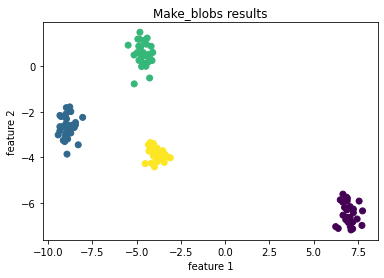

In [2]:
#help(make_blobs)
X, y = make_blobs(n_samples=120, centers=4, cluster_std=0.4, random_state=15) #creating the dataset
plt.scatter(X[:, 0], X[:, 1], c=y) #plotting the data
plt.title("Make_blobs results")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

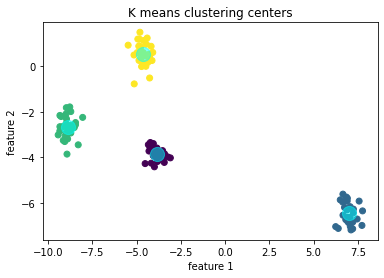

inertia =  35.57666222052574


In [3]:
model = KMeans(n_clusters=4, random_state=5) #creating the kmeans model
y_pred = model.fit_predict(X) #fiting and predicting

centers = model.cluster_centers_ #getting the centers coordinates

plt.scatter(X[:, 0], X[:, 1], c=y_pred) #plotting the data with predicted cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=200, alpha=0.5)
plt.title("K means clustering centers")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

print("inertia = ", model.inertia_)

## K-means clustering - example II

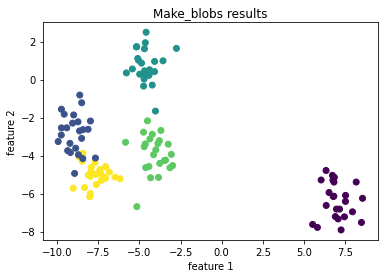

In [4]:
X, y = my_blob = make_blobs(n_samples=120, centers=5, cluster_std=0.8, random_state=15) #creating the dataset
plt.scatter(X[:, 0], X[:, 1], c=y) #plotting the data
plt.title("Make_blobs results")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

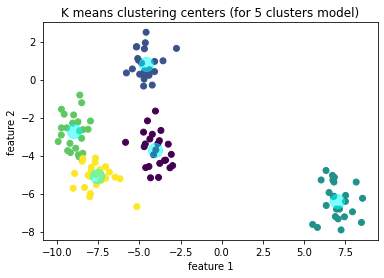

inertia (for 5 clusters model) =  136.23663511339961


In [5]:
model = KMeans(n_clusters=5, random_state=5) #creating the kmeans model
y_pred = model.fit_predict(X) #fiting and predicting

centers = model.cluster_centers_ #getting the centers coordinates

plt.scatter(X[:, 0], X[:, 1], c=y_pred) #plotting the data with predicted cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=200, alpha=0.5)
plt.title("K means clustering centers (for 5 clusters model)")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

print("inertia (for 5 clusters model) = ", model.inertia_)

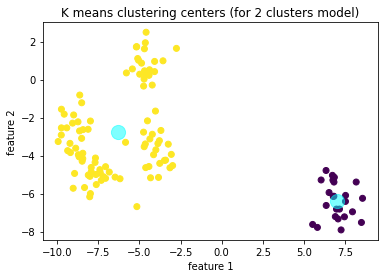

inertia (for 2 clusters model) =  986.5272855034259


In [6]:
model = KMeans(n_clusters=2, random_state=5) #creating the kmeans model
y_pred = model.fit_predict(X) #fiting and predicting

centers = model.cluster_centers_ #getting the centers coordinates

plt.scatter(X[:, 0], X[:, 1], c=y_pred) #plotting the data with predicted cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=200, alpha=0.5)
plt.title("K means clustering centers (for 2 clusters model)")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

print("inertia (for 2 clusters model) = ", model.inertia_)

## K-means ++

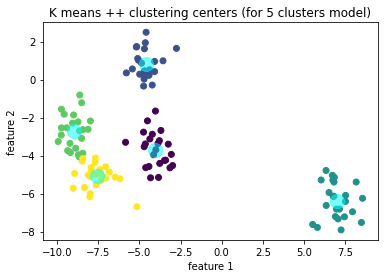

inertia (for 5 clusters model) =  136.23663511339961


In [7]:
model = KMeans(n_clusters=5, init='k-means++', random_state=5) #creating the kmeans++ model
y_pred = model.fit_predict(X) #fiting and predicting

centers = model.cluster_centers_ #getting the centers coordinates

plt.scatter(X[:, 0], X[:, 1], c=y_pred) #plotting the data with predicted cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=200, alpha=0.5)
plt.title("K means ++ clustering centers (for 5 clusters model)")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

print("inertia (for 5 clusters model) = ", model.inertia_)

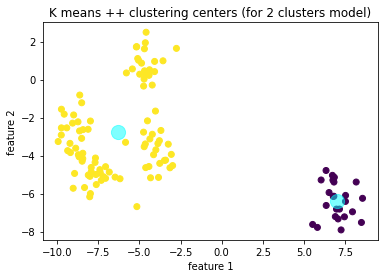

inertia (for 2 clusters model) =  986.5272855034259


In [8]:
model = KMeans(n_clusters=2, init='k-means++', random_state=5) #creating the kmeans++ model
y_pred = model.fit_predict(X) #fiting and predicting

centers = model.cluster_centers_ #getting the centers coordinates

plt.scatter(X[:, 0], X[:, 1], c=y_pred) #plotting the data with predicted cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=200, alpha=0.5)
plt.title("K means ++ clustering centers (for 2 clusters model)")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

print("inertia (for 2 clusters model) = ", model.inertia_) #we there is no difference between k++ means and the previous one?

The result for Kmeans++ method is exactly the same as for simple Kmeans.

## Elbow method


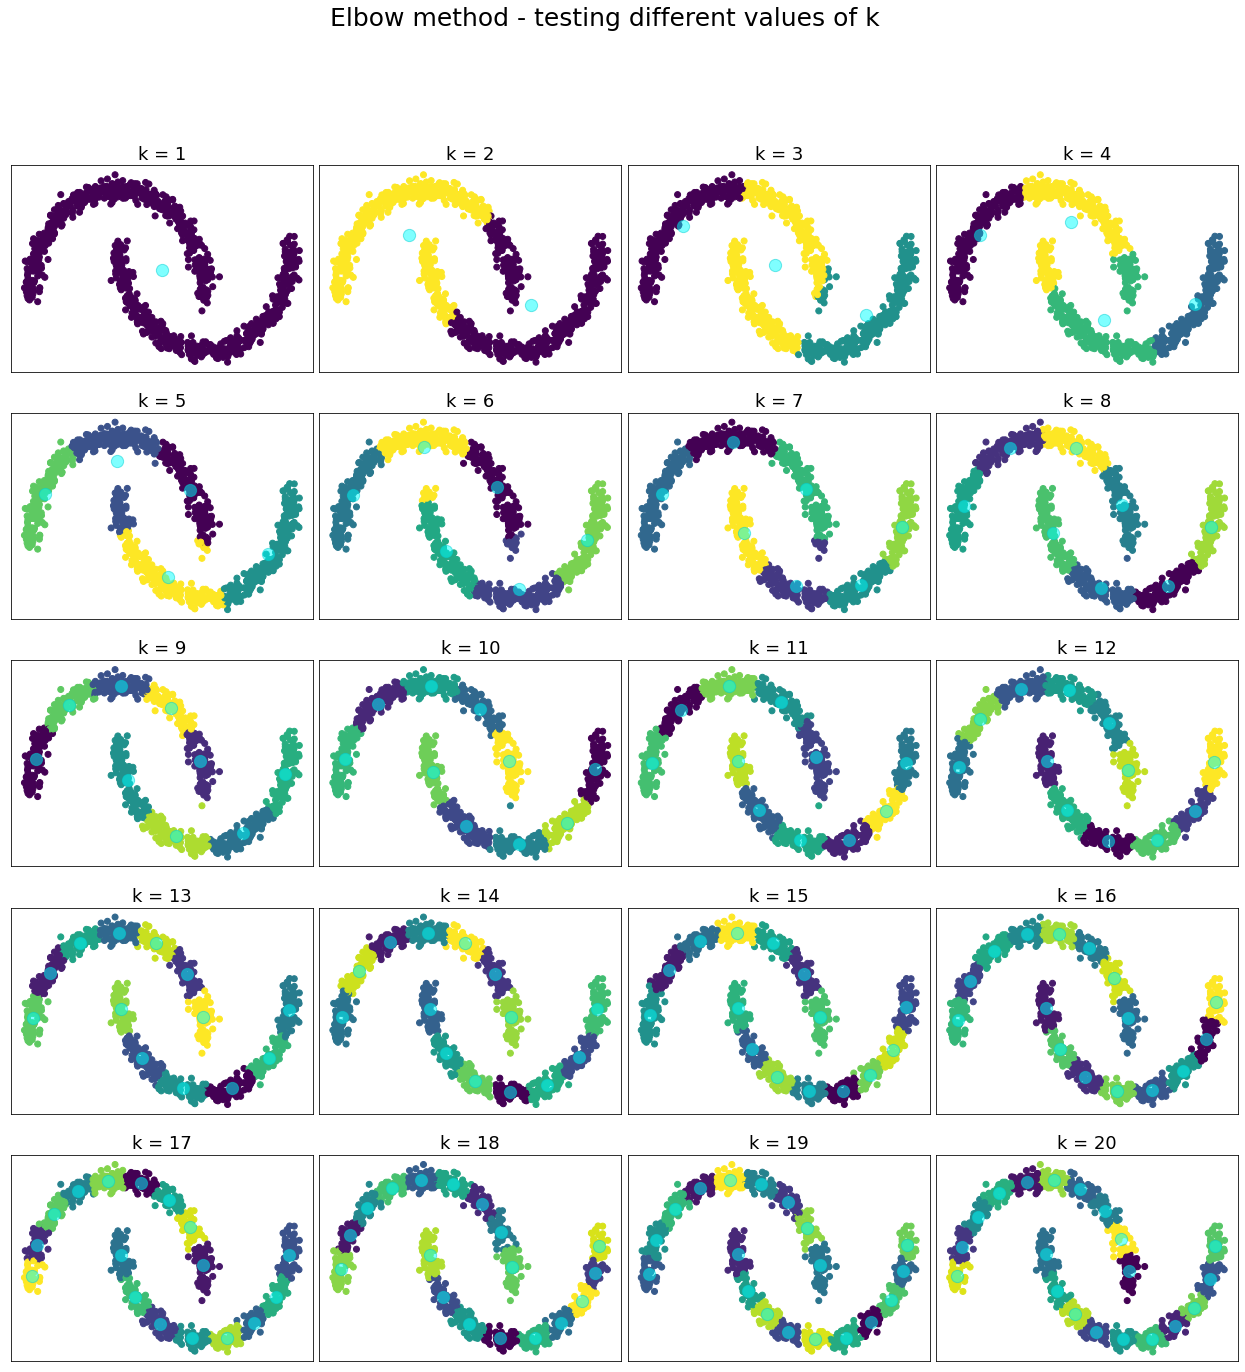

In [9]:
x, y = make_moons(1000, noise=.05, random_state=0) #creating the dataset
X_moon = pd.DataFrame(x, columns = ['f1', 'f2'])
#TODO: Kmeans

inertias = []

fig = plt.figure(figsize=(22, 22))
fig.suptitle("Elbow method - testing different values of k", fontsize=25)
fig.subplots_adjust(wspace=0.02, hspace=0.2)

for k in range(1, 21): #iterating over different values of k - number of clusters for Kmeans
  plt.subplot(5, 4, k)
  model = KMeans(n_clusters=k, random_state=5) #creating the kmeans model
  y_pred = model.fit_predict(X_moon) #fiting and predicting
  centers = model.cluster_centers_ #getting the centers coordinates
  inertias.append(model.inertia_) #getting the inertia

  plt.scatter(X_moon['f1'], X_moon['f2'], c=y_pred) #plotting the data with predicted cluster centers
  plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=150, alpha=0.5, edgecolor='darkturquoise')
  plt.xticks([])
  plt.yticks([])
  plt.title("k = " + str(k), fontsize=18)

plt.show()


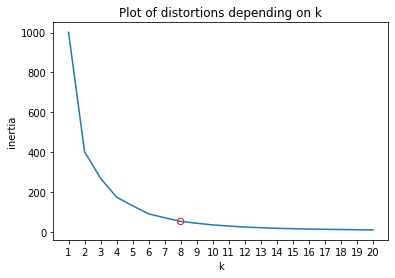

In [10]:
x_plot = np.arange(start=1, stop=21)
plt.plot(x_plot, inertias) # plotting the inertias depending on k
plt.title("Plot of distortions depending on k")
plt.xlabel("k")
plt.ylabel("inertia")
plt.xticks(x_plot)

plt.scatter(8, inertias[7], facecolors='none', edgecolors='r', s=40) #chosing and plotting the best k = 8
plt.show()

I'd say that the best value, after which we have linear plot is k = 8, but I guess it's quite elastic - we could say k = 6 is adequate as well.

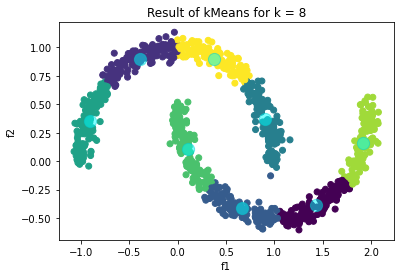

Inertia =  53.514263553367215


In [11]:
model = KMeans(n_clusters=8, random_state=5) #creating the kmeans model
y_pred = model.fit_predict(X_moon) #fiting and predicting
centers = model.cluster_centers_ #getting the centers coordinates

plt.scatter(X_moon['f1'], X_moon['f2'], c=y_pred) #plotting the data with predicted cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=150, alpha=0.5, edgecolor='darkturquoise')
plt.xlabel("f1")
plt.ylabel("f2")
plt.title("Result of kMeans for k = 8")

plt.show()
print("Inertia = ", model.inertia_)

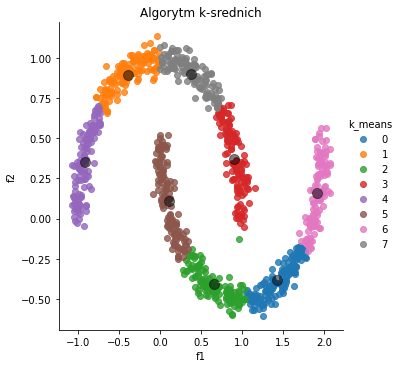

In [12]:
X_moon['k_means'] = y_pred #the same data but plotted with the scirpt from instruction
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means').set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

## Clustering II - hierarchical methods - dendrograms

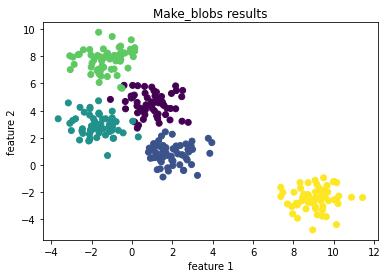

In [13]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0) #creating the dataset

plt.scatter(X[:, 0], X[:, 1], c=y_true) #plotting the data
plt.title("Make_blobs results")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

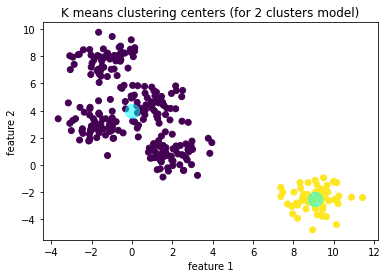

inertia (for 2 clusters model) =  2457.7778032489878


In [14]:
model = KMeans(n_clusters=2, random_state=5) #creating the kmeans model
y_pred = model.fit_predict(X) #fiting and predicting
centers = model.cluster_centers_ #getting the centers coordinates

plt.scatter(X[:, 0], X[:, 1], c=y_pred) #plotting the data with predicted cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=200, alpha=0.5)
plt.title("K means clustering centers (for 2 clusters model)")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

print("inertia (for 2 clusters model) = ", model.inertia_)

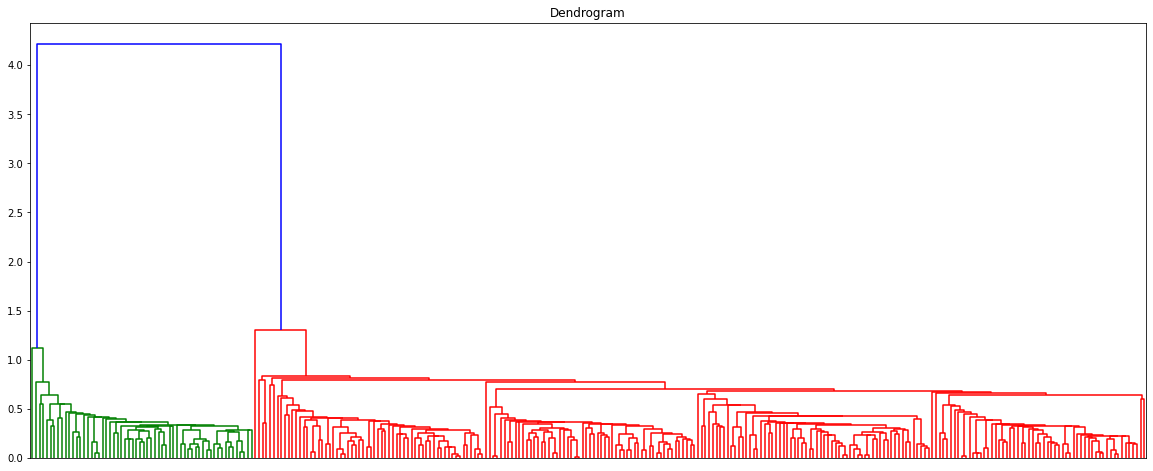

In [15]:
Z = linkage(X) #creating the linkage
fig = plt.figure(figsize=(20, 8))
dn = dendrogram(Z) #creating and plotting dendrogram
plt.title("Dendrogram")
plt.xticks([])
plt.show()

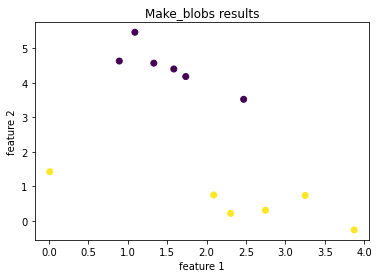

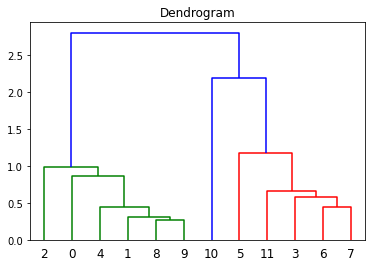

In [16]:
X, y_true = make_blobs(n_samples=12, centers=2, cluster_std=0.8, random_state=0) #creating the smaller dataset
plt.scatter(X[:, 0], X[:, 1], c=y_true) #plotting the data
plt.title("Make_blobs results")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

Z = linkage(X) #creating the linkage
fig = plt.figure()
plt.title("Dendrogram")
dn = dendrogram(Z) #creating and plotting dendrogram
plt.show()

## Agglomerative clustering

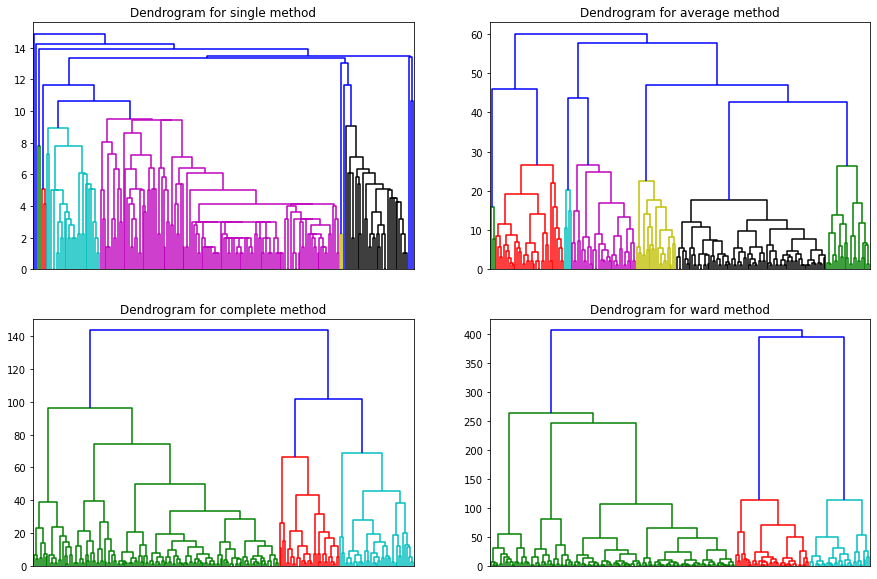

In [17]:
df = pd.read_csv("shopping_data.csv") #importing the data
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

methods = ['single', 'average', 'complete', 'ward']

fig = plt.figure(figsize=(15, 10))
i = 1

for method in methods: #iterating over different linkage methods
  plt.subplot(2, 2, i)

  Z = linkage(X, method) #creating the linkage
  dn = dendrogram(Z) #creating and plotting dendrogram
  
  plt.title("Dendrogram for " + method + " method")
  plt.xticks([])
  i += 1

plt.show()

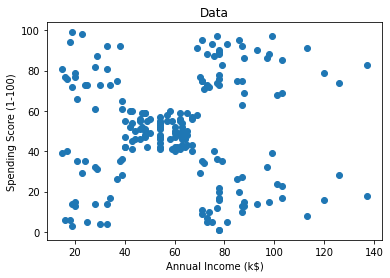

In [18]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)']) #plotting the data
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Data")
plt.show()

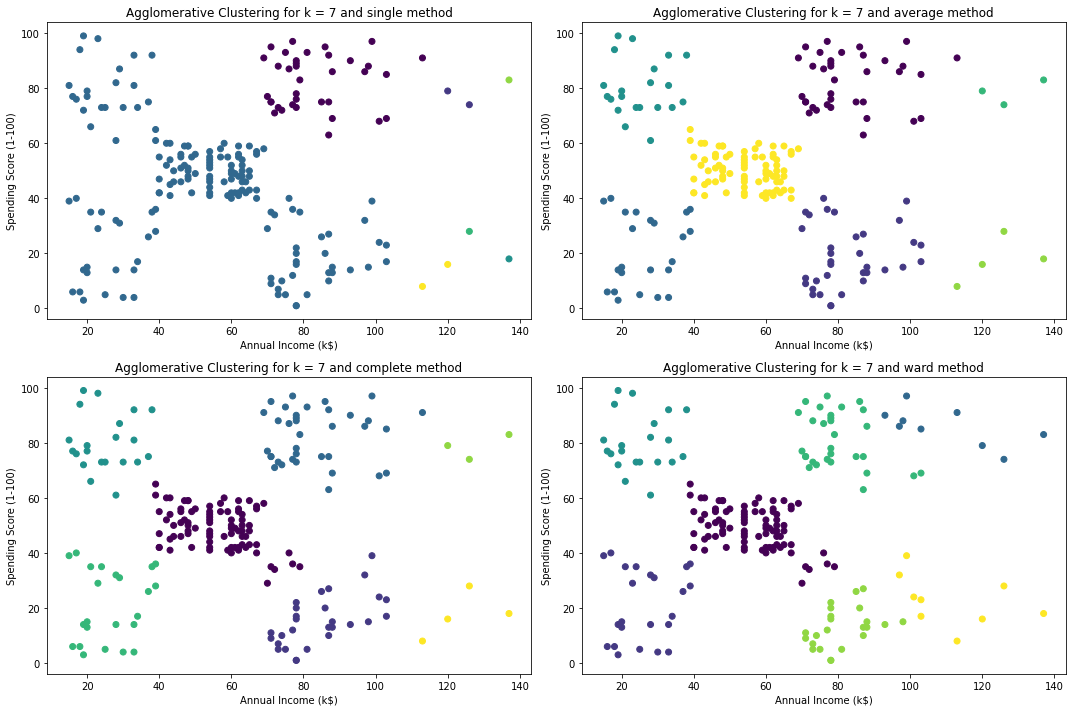

In [19]:
fig = plt.figure(figsize=(15, 10))
i = 1

for method in methods: #iterating over different linkage methods
  model = AgglomerativeClustering(n_clusters=7, linkage=method) #creating the aglomerative model
  y_pred = model.fit_predict(X) #fiting and predicting

  plt.subplot(2, 2, i)
  plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_pred) #plotting the data with predicted clusters
  plt.title("Agglomerative Clustering for k = 7 and " + method + " method")
  plt.xlabel("Annual Income (k$)")
  plt.ylabel("Spending Score (1-100)")
  plt.tight_layout()
  i += 1

plt.show()

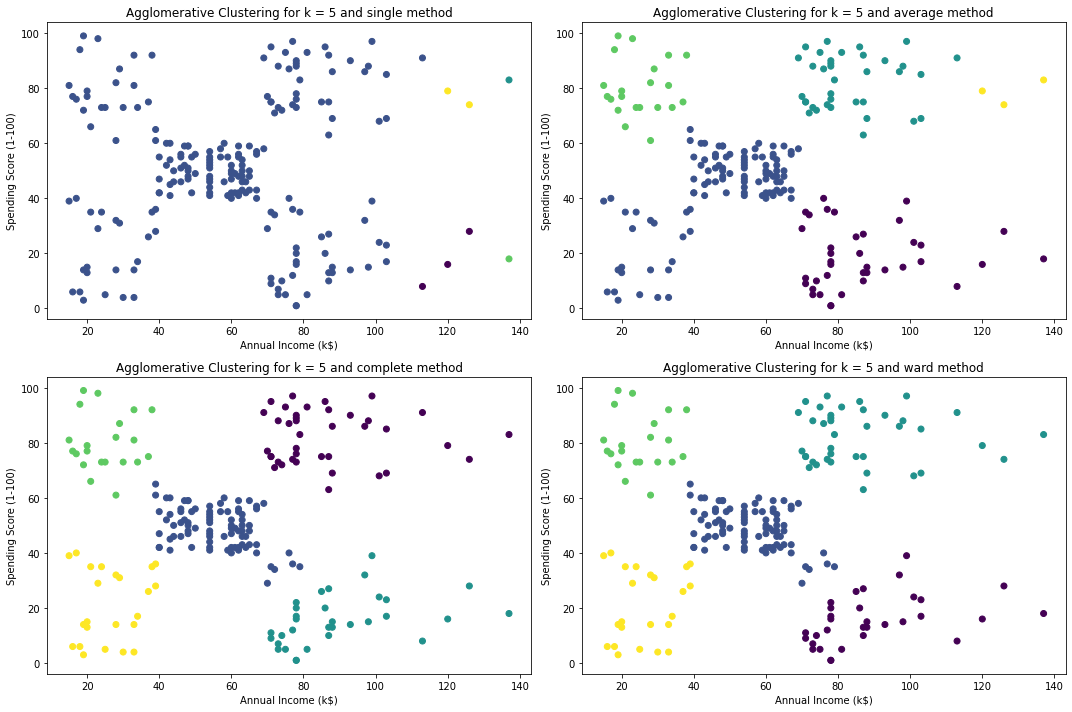

In [20]:
fig = plt.figure(figsize=(15, 10))
i = 1

for method in methods: #iterating over different linkage methods
  model = AgglomerativeClustering(n_clusters=5, linkage=method) #creating the aglomerative model
  y_pred = model.fit_predict(X) #fiting and predicting

  plt.subplot(2, 2, i)
  plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_pred) #plotting the data with predicted clusters
  plt.title("Agglomerative Clustering for k = 5 and " + method + " method")
  plt.xlabel("Annual Income (k$)")
  plt.ylabel("Spending Score (1-100)")
  plt.tight_layout()
  i += 1

plt.show()

## Selecting the number of clusters with silhouette analysis on KMeans clustering

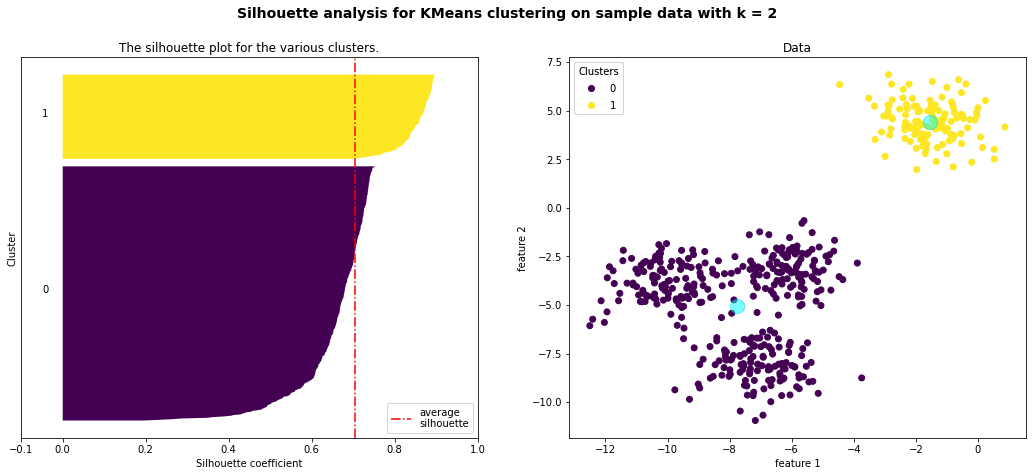


For k = 2 The average silhouette_score = 0.7049787496083262






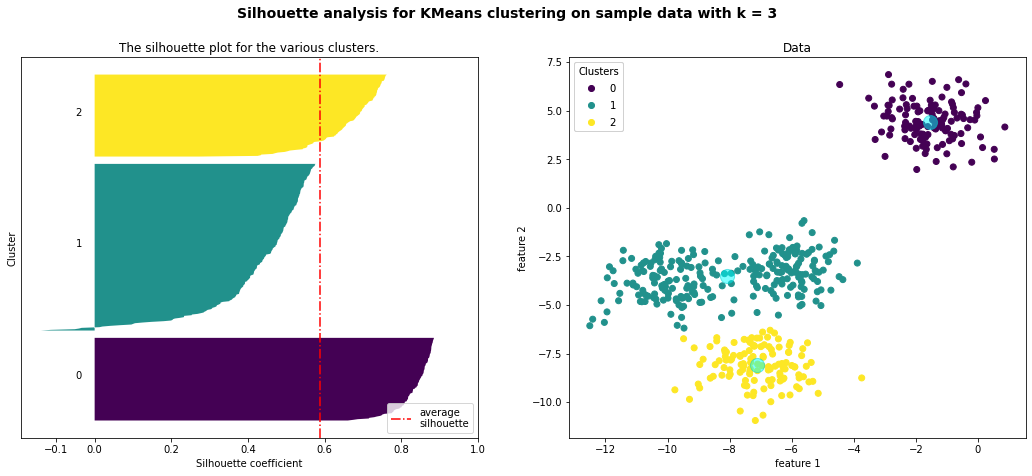


For k = 3 The average silhouette_score = 0.5882004012129721






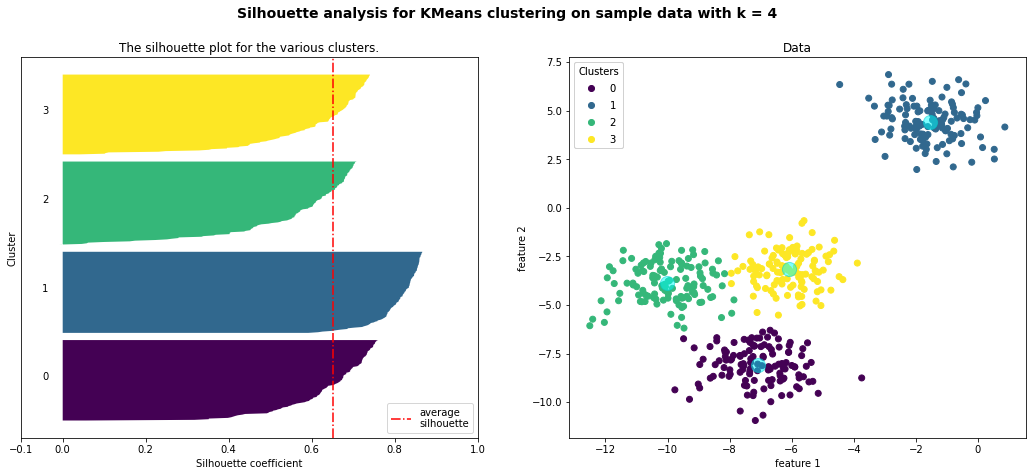


For k = 4 The average silhouette_score = 0.6505186632729437






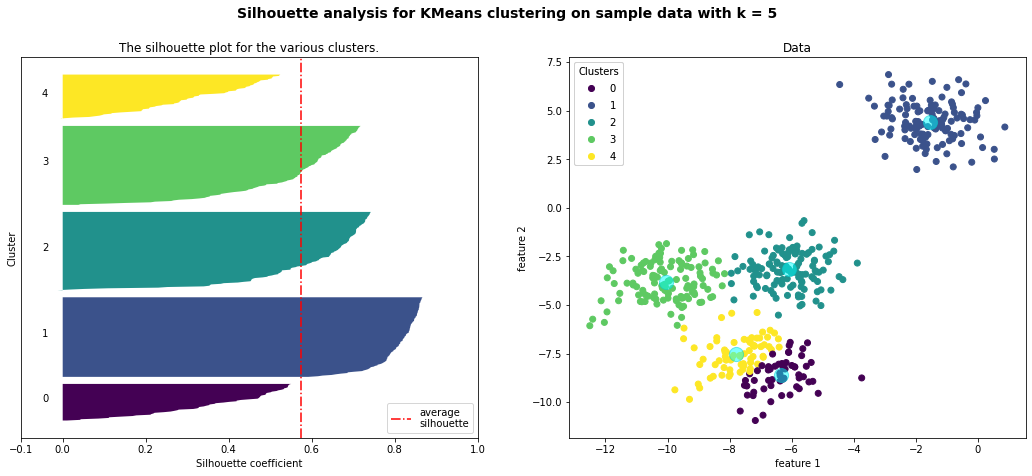


For k = 5 The average silhouette_score = 0.5745566973301872






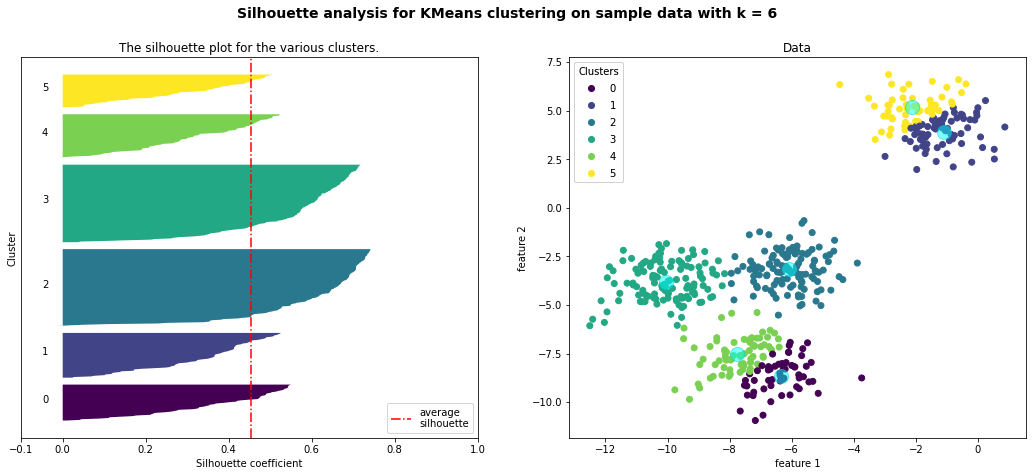


For k = 6 The average silhouette_score = 0.4525602224680235






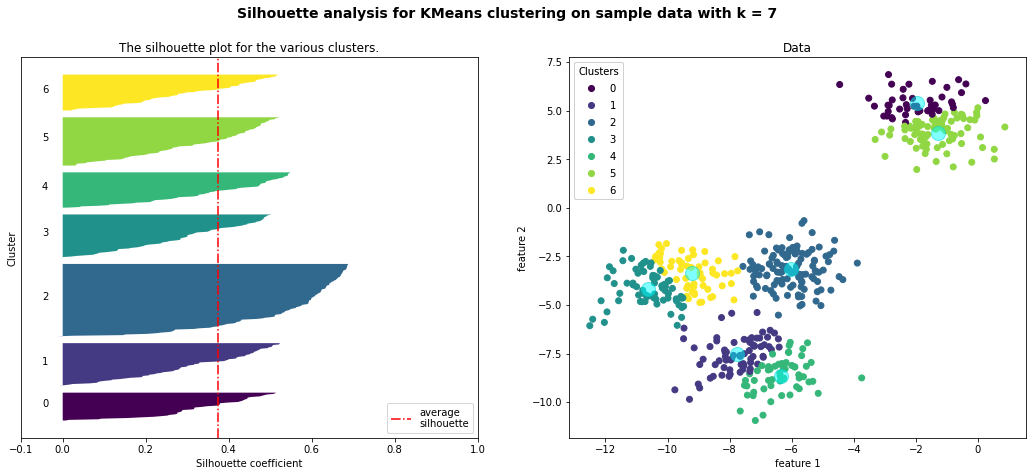


For k = 7 The average silhouette_score = 0.3735643846732153






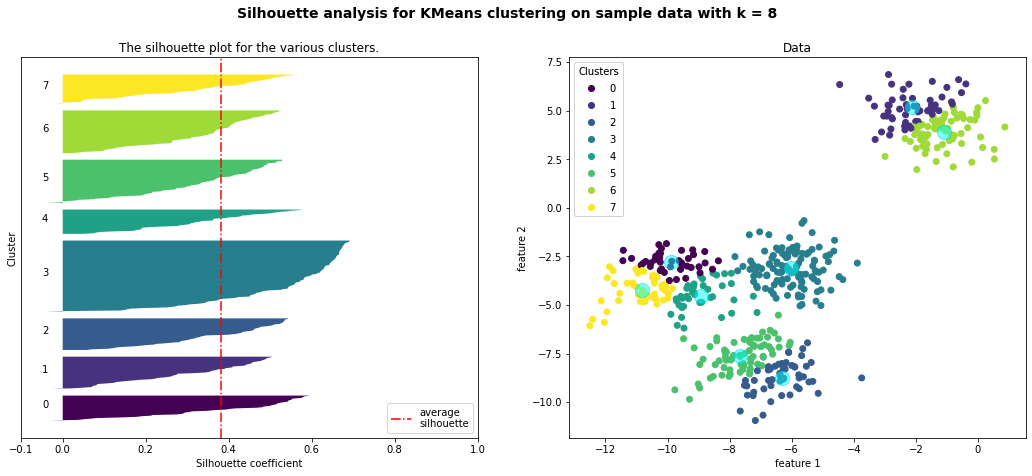


For k = 8 The average silhouette_score = 0.3808524806971933


In [21]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1) #creating the dataset
range_n_clusters = np.arange(2, 9) #creating the range for number of clusters

for k in range_n_clusters: # iterating over different numbers of clusters
    print("\n\n\n")
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    model = KMeans(n_clusters=k, random_state=5) #creating the kmeans model
    y_pred = model.fit_predict(X) #fiting and predicting

    silhouette_avg = silhouette_score(X, y_pred) #computing the average silhouette score
    sample_silhouette = silhouette_samples(X, y_pred) #computing the silhouette score for every sample

    y_lower = 10

    cols_outer = np.linspace(start=0, stop=1, num=k) #vector for colors on silhouette plot

    for i in range(k): #iterating over clusters
        ith_cluster_silhouette = sample_silhouette[y_pred == i] #Aggregating the silhouette scores for samples from one cluster and sorting them
        ith_cluster_silhouette.sort()

        size_cluster_i = ith_cluster_silhouette.shape[0]
        y_upper = y_lower + size_cluster_i #determining the size of cluster for silhouette plot

        cols = cm.viridis(cols_outer[i]) #creating colors for silhouette plot
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette, facecolor=cols) #creating the silhouette plot
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) #labeling the cluster

        y_lower = y_upper + 10 #proceeding to next cluster

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="dashdot", label="average\nsilhouette") #plotting the average silhouette line
    ax1.legend(loc='lower right')

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    scatter = ax2.scatter(X[:, 0], X[:, 1], c=y_pred) #plotting the data with predicted cluster centers
    legend1 = ax2.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
    ax2.add_artist(legend1)

    centers = model.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], c="cyan", alpha=0.5, s=200, edgecolor='darkturquoise')
    ax2.set_title("Data")
    ax2.set_xlabel("feature 1")
    ax2.set_ylabel("feature 2")

    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with k = %d" % k, fontsize=14, fontweight="bold")

    plt.show()
    print("\nFor k =", k, "The average silhouette_score =", silhouette_avg)

For k = 2 we have every silhouette plot behind the average silhouette line, but clusters differ siginificantly in size.  
For k = 3, 5 we have silhouette plots for some clusters before the avg line  
For k = 6-8 the average silhouette is quite low and for 6 and 7 we have uneven cluster sizes.

In my opnion the best fit is k = 4. Clusters are similiar in size and every one of silhouette plots is behind the avg line, whic isn't very low.

## DBSCAN algorithm

In [22]:
n_samples = 1500
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
blobs = make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]

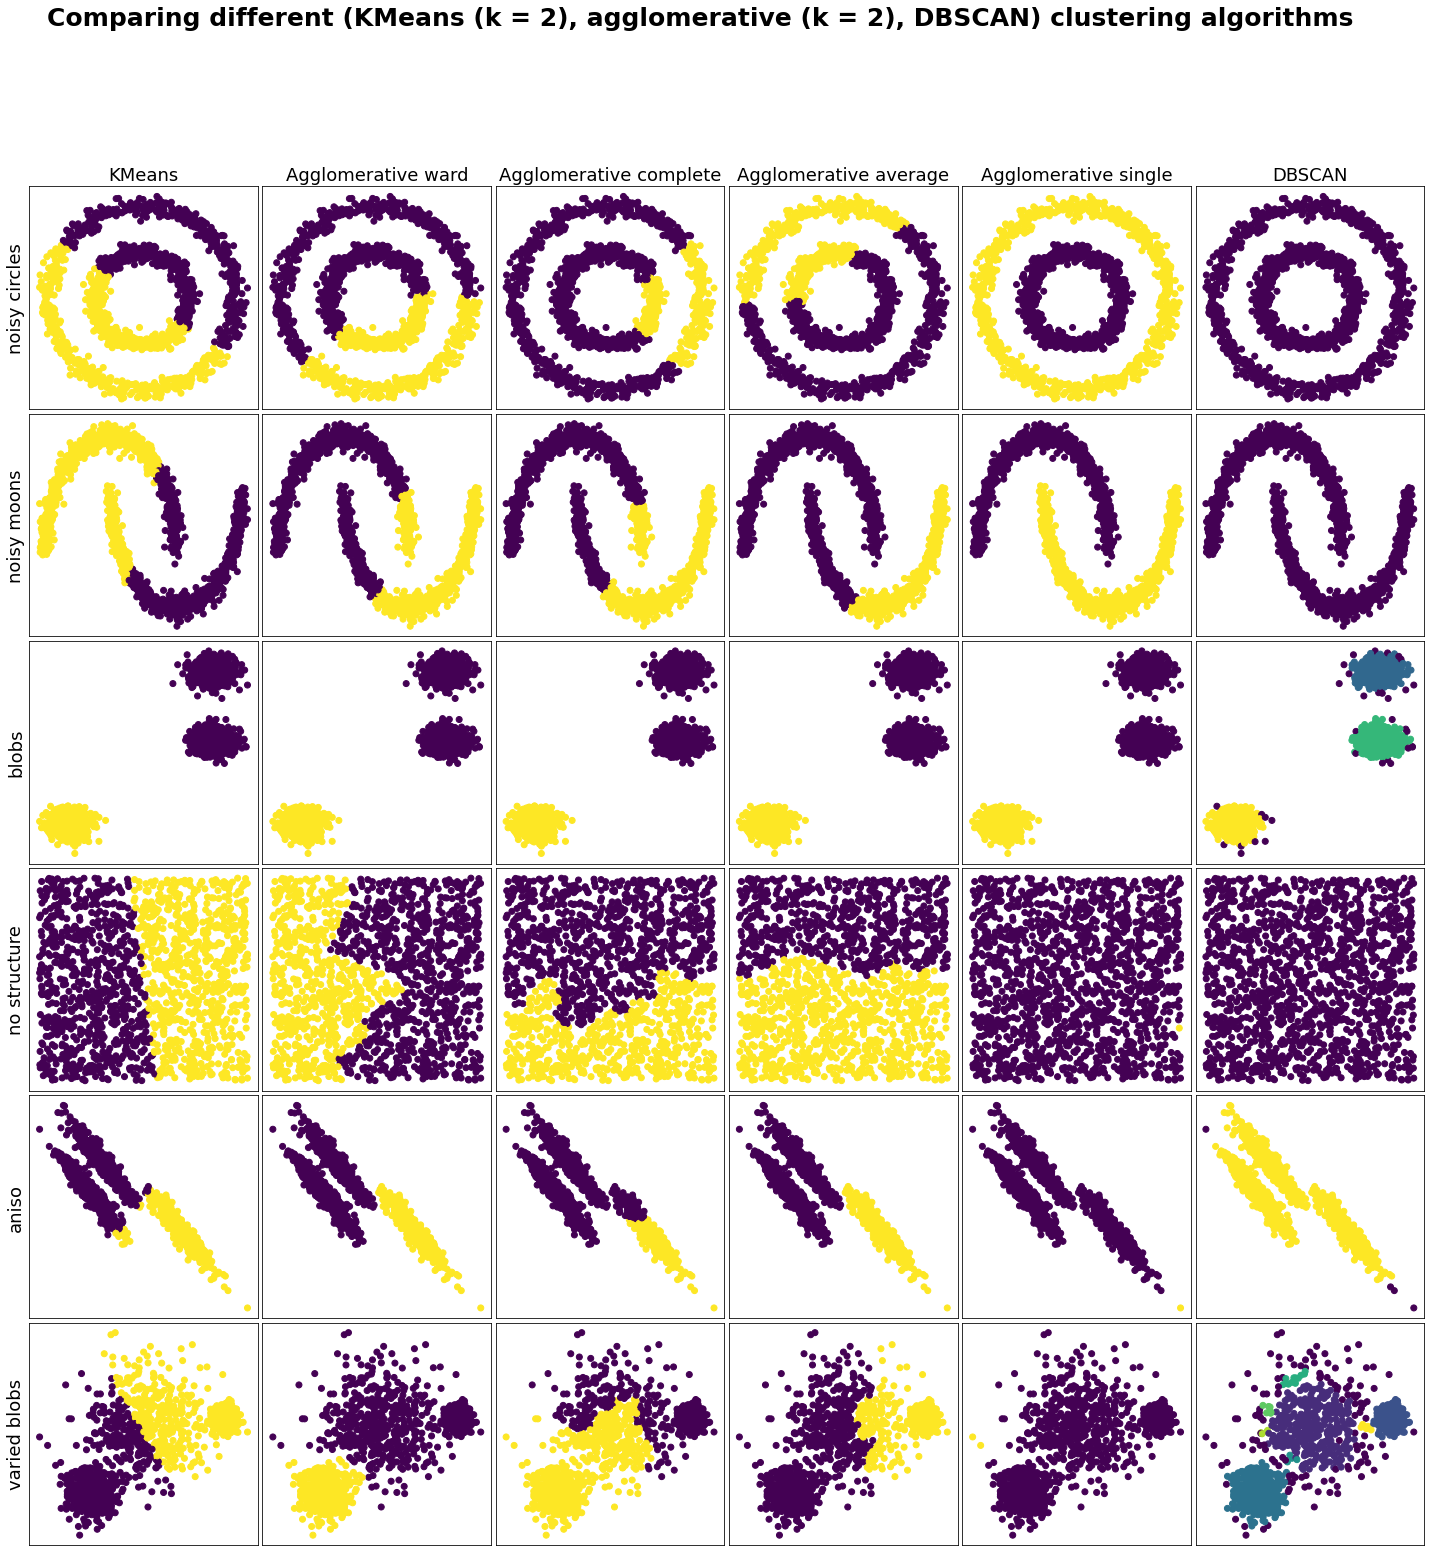

In [23]:
fig = plt.figure(figsize=(25, 25))
fig.subplots_adjust(wspace=0.02, hspace=0.02)

i = 1

for dataset in datasets:
  X, y = dataset
  dataset_name = str(dataset)

  for j in range(6): # chosing clustering model
    ylab = ""
    if j == 0: 
      model = KMeans(n_clusters = 2, random_state=5)
      model_name = "KMeans"
      if i == 1: #labeling datasets
        ylab = 'noisy circles'
      elif i == 7:
        ylab = 'noisy moons'
      elif i == 13:
        ylab = 'blobs'
      elif i == 19:
        ylab = 'no structure'
      elif i == 25:
        ylab = 'aniso'
      elif i == 31:
        ylab = 'varied blobs'
      
    elif j  == 1:
      model = AgglomerativeClustering(linkage='ward')
      model_name = "Agglomerative ward"
    elif j == 2:
      model = AgglomerativeClustering(linkage='complete')
      model_name = "Agglomerative complete"
    elif j == 3:
      model = AgglomerativeClustering(linkage='average')
      model_name = "Agglomerative average"
    elif j == 4:
      model = AgglomerativeClustering(linkage='single')
      model_name = "Agglomerative single"
    elif j == 5:
      model = DBSCAN()
      model_name = "DBSCAN"
  
    y_pred = model.fit_predict(X) #fiting and predicting

    plt.subplot(6, 6, i)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) #plotting the data with predicted clusters
    if i <= 6:
      plt.title(model_name, fontsize=18) #labeling methods
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(ylab, fontsize=18)
    i += 1

plt.suptitle("Comparing different (KMeans (k = 2), agglomerative (k = 2), DBSCAN) clustering algorithms ", fontsize=25, fontweight="bold")
plt.show()

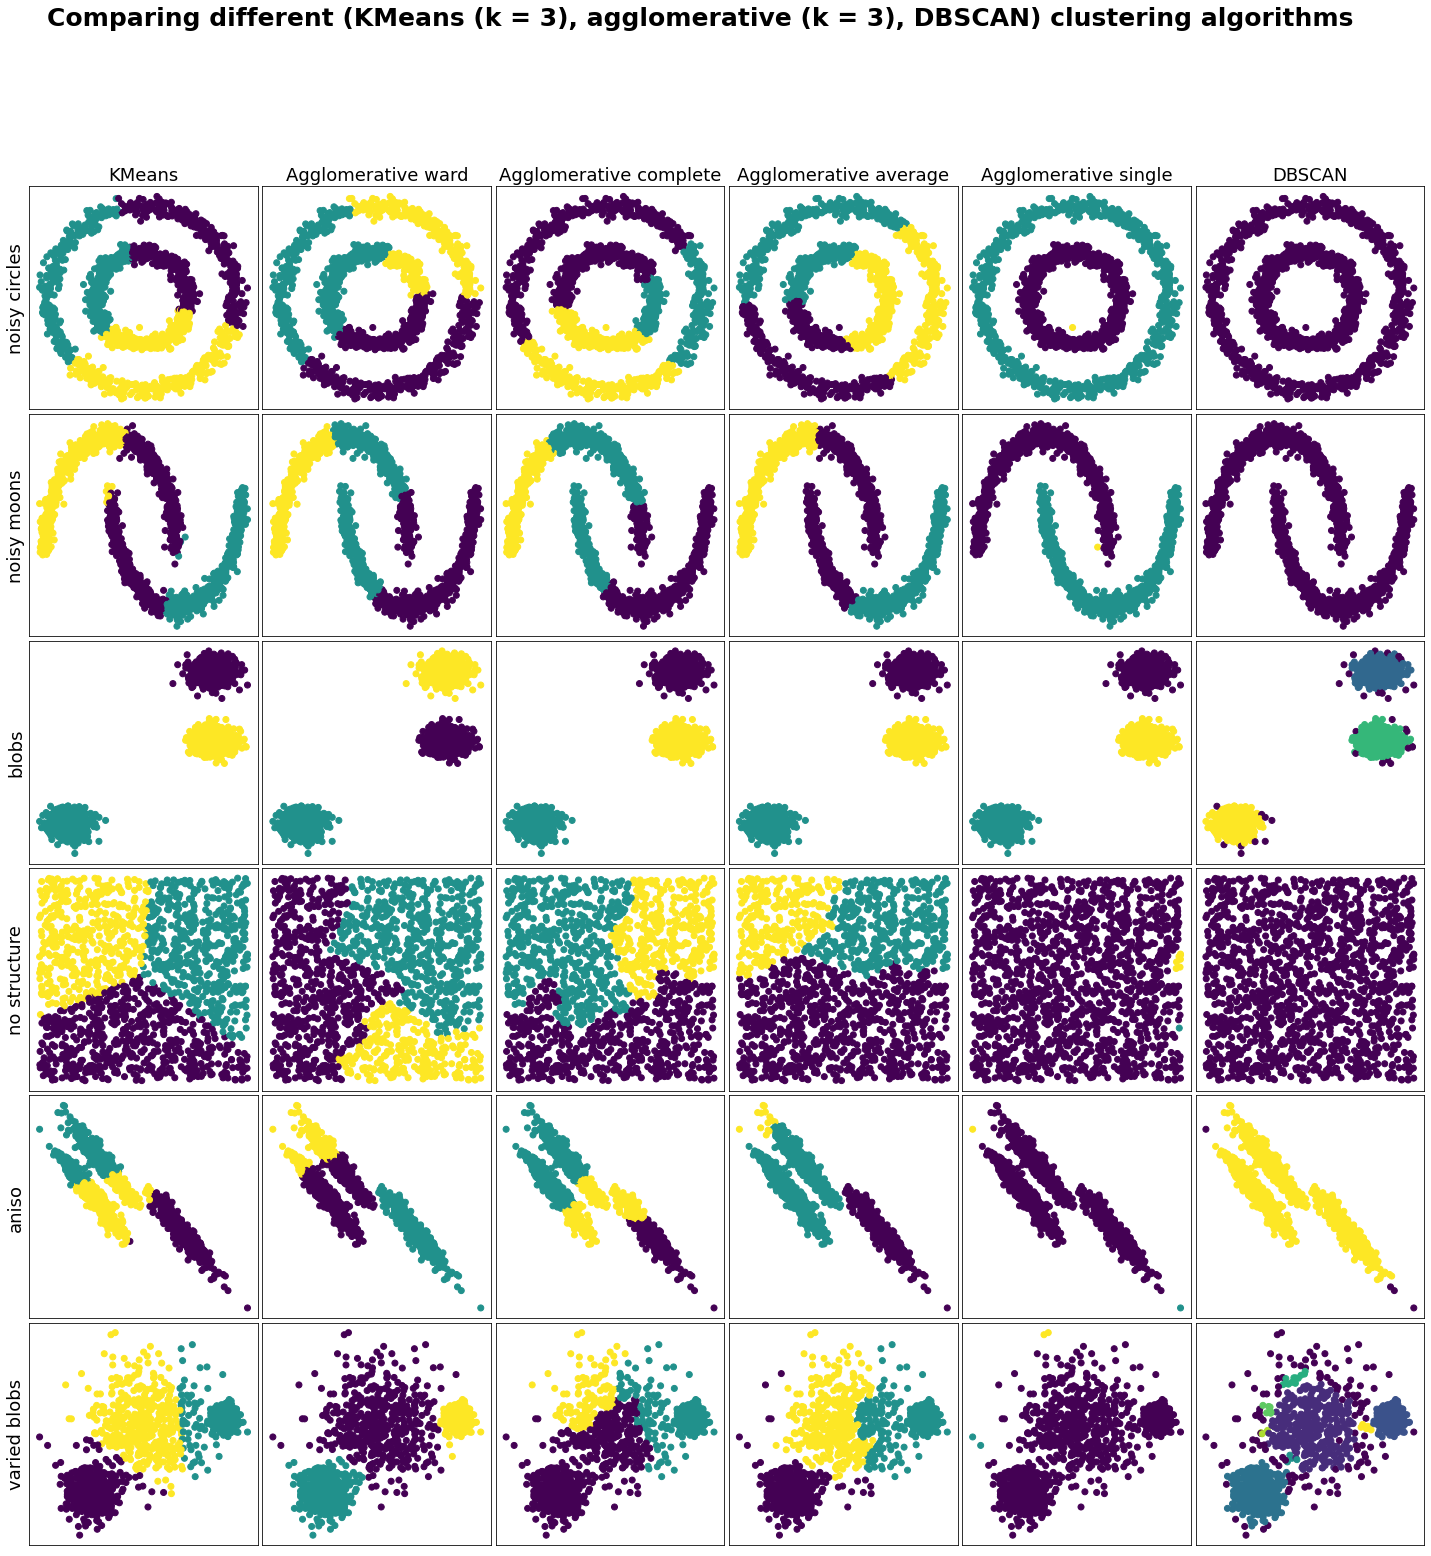

In [24]:
fig = plt.figure(figsize=(25, 25))
fig.subplots_adjust(wspace=0.02, hspace=0.02)

i = 1

for dataset in datasets: #iterating over datasets
  X, y = dataset
  dataset_name = str(dataset)

  for j in range(6): # chosing clustering model
    ylab = ""
    if j == 0:
      model = KMeans(n_clusters=3, random_state=5)
      model_name = "KMeans"
      if i == 1: #labeling datasets
        ylab = 'noisy circles'
      elif i == 7:
        ylab = 'noisy moons'
      elif i == 13:
        ylab = 'blobs'
      elif i == 19:
        ylab = 'no structure'
      elif i == 25:
        ylab = 'aniso'
      elif i == 31:
        ylab = 'varied blobs'
      
    elif j  == 1:
      model = AgglomerativeClustering(linkage='ward', n_clusters=3)
      model_name = "Agglomerative ward"
    elif j == 2:
      model = AgglomerativeClustering(linkage='complete', n_clusters=3)
      model_name = "Agglomerative complete"
    elif j == 3:
      model = AgglomerativeClustering(linkage='average', n_clusters=3)
      model_name = "Agglomerative average"
    elif j == 4:
      model = AgglomerativeClustering(linkage='single', n_clusters=3)
      model_name = "Agglomerative single"
    elif j == 5:
      model = DBSCAN()
      model_name = "DBSCAN"
  
    y_pred = model.fit_predict(X) #fiting and predicting

    plt.subplot(6, 6, i)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) #plotting the data with predicted clusters
    if i <= 6:
      plt.title(model_name, fontsize=18) #labeling methods
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(ylab, fontsize=18)
    i += 1

plt.suptitle("Comparing different (KMeans (k = 3), agglomerative (k = 3), DBSCAN) clustering algorithms ", fontsize=25, fontweight="bold")
plt.show()

We can see that every clustering method is dedicated for different datasets. The best way to choose the method is to plot data first and after that we can safely choose the best method.